In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## SVM Linear 

In [3]:
diabetes = pd.read_csv('diabetes2.csv')

In [4]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.shape

(768, 9)

In [7]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.loc[:, diabetes.columns != 'Outcome'], 
    diabetes['Outcome'], 
    stratify=diabetes['Outcome'], 
    test_size=0.2, 
    random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
# RBF Kernel
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.81
Accuracy on test set: 0.73


In [18]:
# Linear Kernel
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.71


In [19]:
# Polynomial Kernel
svc = SVC(kernel='poly')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.82
Accuracy on test set: 0.69


In [21]:
# Sigmoid Kernel
svc = SVC(kernel='sigmoid')
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.43
Accuracy on test set: 0.57


## SVM Non Linear

In [22]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [23]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [24]:
print(fruits.shape)

(59, 7)


In [25]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [26]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [29]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# RBF Kernel
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.93


In [36]:
# Linear Kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.70
Accuracy on test set: 0.53


In [37]:
# Polynomial Kernel
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.98
Accuracy on test set: 0.73


In [38]:
# Sigmoid Kernel
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.36
Accuracy on test set: 0.20


## Linear and Non-Linear SVM Classification Scatter plot

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [40]:
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

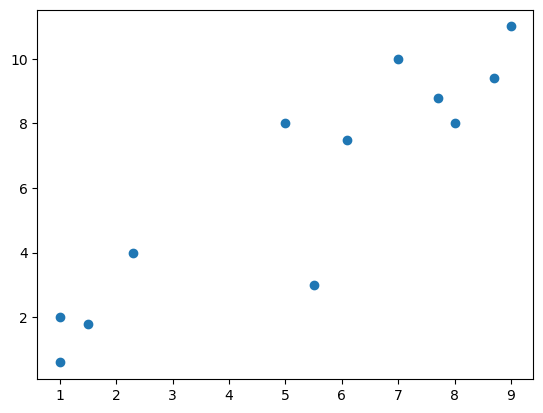

In [41]:
plt.scatter(X, y)
plt.show()

In [42]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [43]:
clf = svm.SVC(kernel='linear', C=1.0)

In [44]:
# train the model
clf.fit(training_X, training_y)

SVC(kernel='linear')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


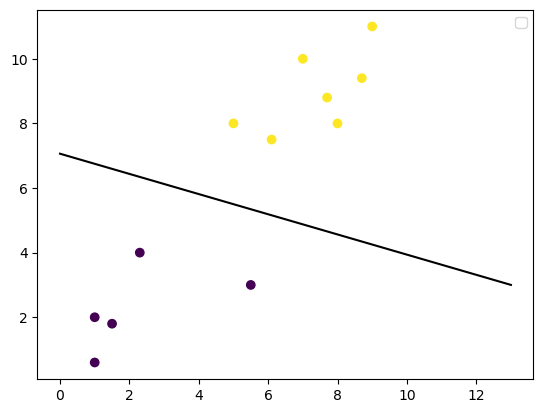

In [45]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

In [47]:
from sklearn import datasets
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

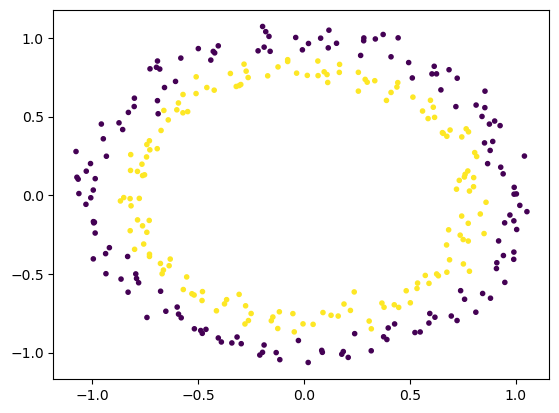

In [48]:
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [49]:
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

In [50]:
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [51]:
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

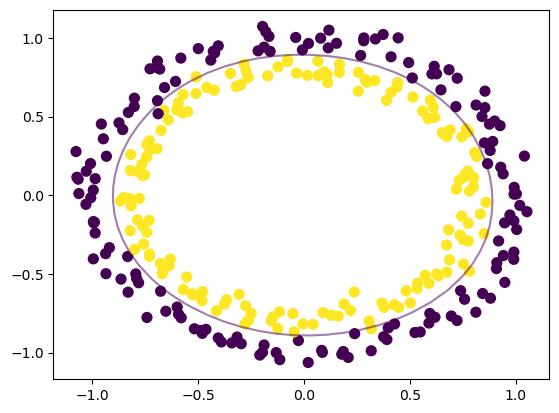

In [52]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()


## MLP Classifier with 3 hidden layers

In [23]:
#Imports
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [25]:
#load the data
iris_data = load_iris()

In [26]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [19]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [28]:
# Model
clf = MLPClassifier(hidden_layer_sizes=(256,128,128),activation="relu",random_state=1).fit(X_trainscaled, y_train)

In [29]:
y_pred=clf.predict(X_testscaled)
print(clf.score(X_testscaled, y_test))

1.0


/Users/selva/enter/envs/dlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


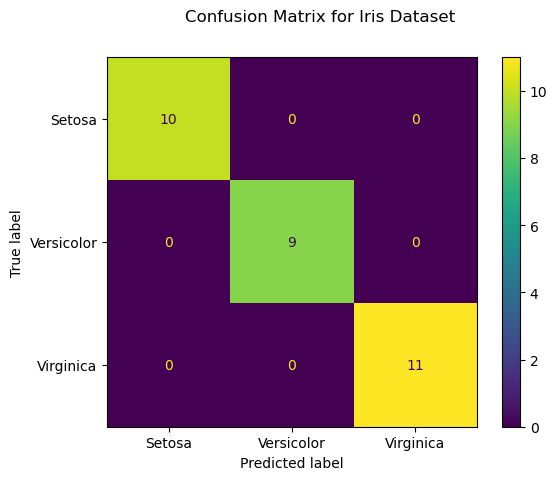

In [22]:
fig=plot_confusion_matrix(clf, X_testscaled, y_test,display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()

## MLP Model with Non-linear dataset

In [30]:
#imports
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [31]:
#load the data
data = fetch_california_housing()

In [3]:
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

In [32]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.2)

In [6]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [33]:
#Model
reg = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100),
    activation="relu" ,
    random_state=42, 
    max_iter=2000).fit(X_trainscaled, y_train)

In [34]:
y_pred=reg.predict(X_testscaled)

In [35]:
print("The Score with ", (r2_score(y_pred, y_test)))

The Score with  0.940028022427157
